Substructure searching is one of the fundamental tools of cheminformatics. In this example we'll use the [substructure searching in OEChem](http://docs.eyesopen.com/toolkits/python/oechemtk/patternmatch.html#substructure-search) in conjuction with the pandas dataframes that [OENotebook](http://beta-docs.eyesopen.com/toolkits/oenotebook/) provides.

In [2]:
from __future__ import print_function

# import OE tools and data
import oenotebook as oenb

,Molecule,Title
0,,25864246
1,,25167497
2,,24665960
3,,2251284
4,,5632287

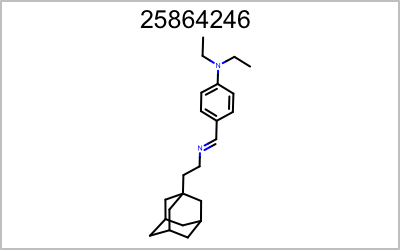
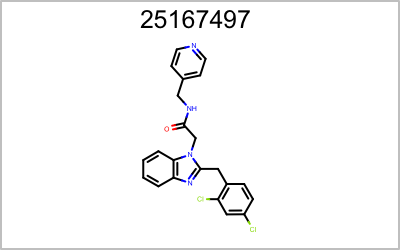
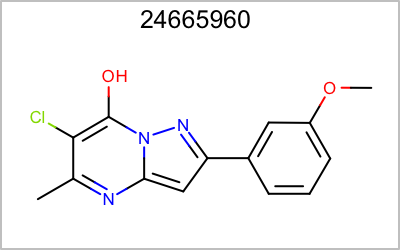
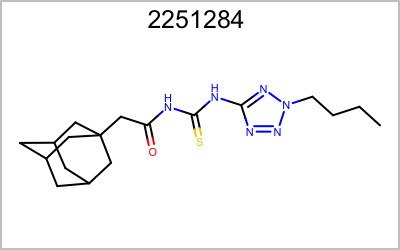
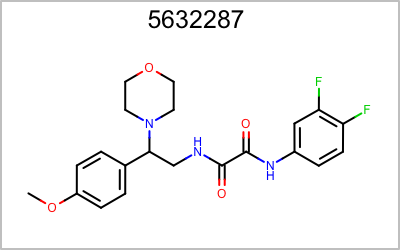

In [3]:
# Read molecules into a Pandas Dataframe
df = oenb.read_file_to_dataframe("./eMol_ran50.ism", title_col="Title")

# Check to make sure data looks right
oenb.render_dataframe(df.head())

### Basic Substructure Search
We'll create a simple substructure search that looks for a benzyl ring

benzene matches toluene


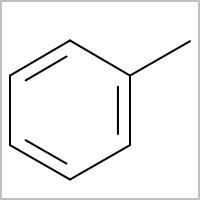

In [4]:
from openeye import oechem
mol = oechem.OEGraphMol( ) 

# Have some toluene
oechem.OEParseSmiles(mol, "c1ccccc1C")

# create a substructure search object for benzene
ss = oechem.OESubSearch("c1ccccc1") 

if ss.SingleMatch(mol):
    print("benzene matches toluene") 
else:
    print("benzene does not match toluene")

oenb.draw_mol(mol)

### Substructure Search and a DataFrame
Now we can work with this substructure search by generating a new column in our dataframe with the binary output of the substructure match.

,Molecule,Title,HasBenzene
0,,25864246,True
1,,25167497,True
2,,24665960,True
3,,2251284,False
4,,5632287,True

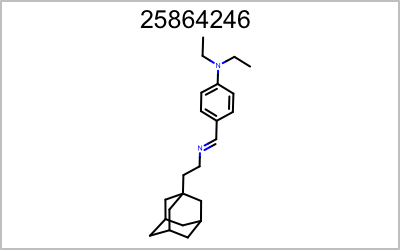
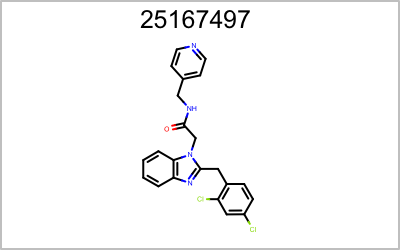
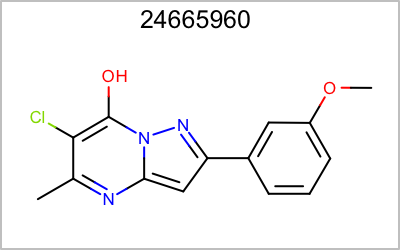
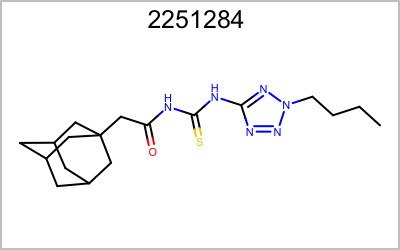
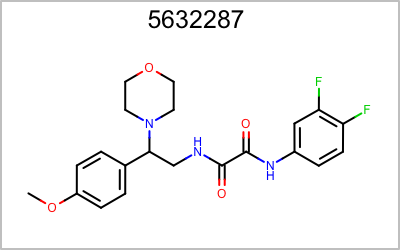

In [5]:
# Apply our search to the molecules in the dataframe
df["HasBenzene"] = df.Molecule.apply(ss.SingleMatch)

oenb.render_dataframe(df.head())

In [14]:
benzyls = df[df.HasBenzene == True]
benzyls.count()

Molecule      44
Title         44
HasBenzene    44
dtype: int64

### Rendering the DataFrame with a Custom Depiction
Finally we'll write a custom depiction function (derived from [this OEDepict example](http://docs.eyesopen.com/toolkits/python/depicttk/examples_summary.html#depicting-substructure-search-match)) for our substructure search to highlight the matches for each molecule in our dataframe. Once we've written and confirmed this function depicts the match, we'll pass it to the `render_dataframe` function to see our custom depiction in the dataframe.

In [26]:
from openeye import oedepict
from IPython.display import HTML, display
from base64 import b64encode

def draw_subsearch_highlights(mol, width=400., height=400., subsearch=ss):
    opts = oedepict.OE2DMolDisplayOptions(width, height, oedepict.OEScale_AutoScale)

    mol = oechem.OEGraphMol(mol)
    oedepict.OEPrepareDepiction(mol)
    img = oedepict.OEImage(width, height)
    hstyle = oedepict.OEHighlightByBallAndStick(oechem.OEBlueTint)

    disp = oedepict.OE2DMolDisplay(mol, opts)
    unique = True
    for match in subsearch.Match(mol, unique):
        oedepict.OEAddHighlighting(disp, hstyle, match)
    
    oedepict.OERenderMolecule(img, disp)
    return oenb.draw_oeimage_to_img_tag(img)
    


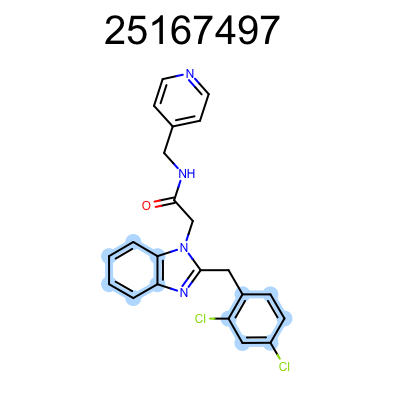

In [30]:
HTML(draw_subsearch_highlights(df.Molecule.iloc[1]))

,Molecule,Title,HasBenzene
0,,25864246,True
1,,25167497,True
2,,24665960,True
3,,2251284,False
4,,5632287,True

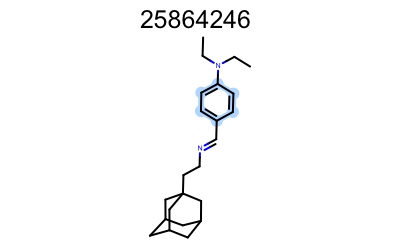
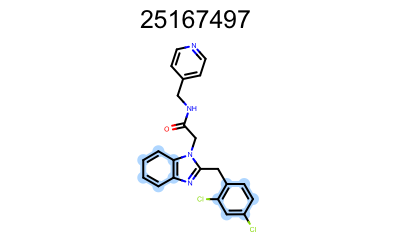
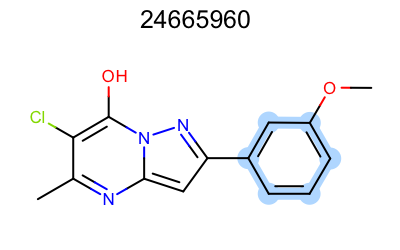
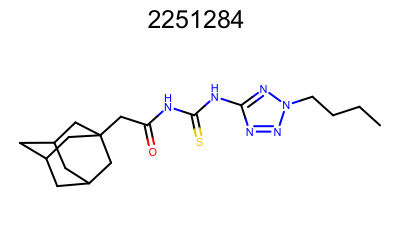
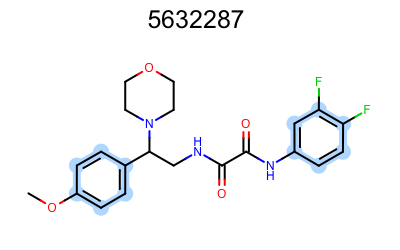

In [31]:
oenb.render_dataframe(df.head(),render_func=lambda x, width, height: draw_subsearch_highlights(x, width, height))